In [305]:
#!pip install vaderSentiment
#!pip install nltk

# Load thelibraries
import requests
import json
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import nltk
# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer


from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [169]:
url = "https://api.pullpush.io/reddit/search/submission/?q=(Ireland Irish Commute Commuting)&after=1000d&before=1d&sort=asc&size=500"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data['data'])

In [170]:
url2 = "https://api.pullpush.io/reddit/search/submission/?q=(Ireland Irish Commute Commuting)&after=2000d&before=1001d&sort=asc&size=500"
response2 = requests.get(url2)
data2 = response2.json()
df2 = pd.DataFrame(data2['data'])

In [171]:
url3 = "https://api.pullpush.io/reddit/search/submission/?q=(Ireland Irish Commute Commuting)&after=3000d&before=2001d&sort=asc&size=500"
response3 = requests.get(url3)
data3 = response3.json()
df3 = pd.DataFrame(data3['data'])


In [172]:
url4 = "https://api.pullpush.io/reddit/search/submission/?q=(Ireland Irish Commute Commuting)&after=4000d&before=3001d&sort=asc&size=500"
response4 = requests.get(url4)
data4 = response4.json()
df4 = pd.DataFrame(data4['data'])

In [173]:
url5 = "https://api.pullpush.io/reddit/search/submission/?q=(Ireland Irish Commute Commuting)&before=4001d&sort=asc&size=500"
response5 = requests.get(url5)
data5 = response5.json()
df5 = pd.DataFrame(data5['data'])

In [174]:
comment_url = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=150d&before=1d&sort=asc&size=500"
comment_response = requests.get(comment_url)
comment_data = comment_response.json()
comment_df = pd.DataFrame(comment_data['data'])

In [175]:
comment_url2 = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=350d&before=151d&sort=asc&size=500"
comment_response2 = requests.get(comment_url2)
comment_data2 = comment_response2.json()
comment_df2 = pd.DataFrame(comment_data2['data'])

In [176]:
comment_url3 = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=600d&before=351d&sort=asc&size=500"
comment_response3 = requests.get(comment_url3)
comment_data3 = comment_response3.json()
comment_df3 = pd.DataFrame(comment_data3['data'])

In [177]:
comment_url4 = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=850d&before=601d&sort=asc&size=500"
comment_response4 = requests.get(comment_url4)
comment_data4 = comment_response4.json()
comment_df4 = pd.DataFrame(comment_data4['data'])

In [178]:
comment_url5 = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=1050d&before=851d&sort=asc&size=500"
comment_response5 = requests.get(comment_url5)
comment_data5 = comment_response5.json()
comment_df5 = pd.DataFrame(comment_data5['data'])

In [179]:
comment_url6 = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=1300d&before=1051d&sort=asc&size=500"
comment_response6 = requests.get(comment_url6)
comment_data6 = comment_response6.json()
comment_df6 = pd.DataFrame(comment_data6['data'])

In [180]:
Comments = df.selftext 
Comments2 = df2.selftext 
Comments3 = df3.selftext 
Comments4 = df4.selftext 
Comments5 = df5.selftext 

Replies = comment_df.body
Replies2 = comment_df2.body
Replies3 = comment_df3.body
Replies4 = comment_df4.body
Replies5 = comment_df5.body
Replies6 = comment_df6.body

In [181]:
Comments.shape

(93,)

In [182]:
Comments2.shape

(72,)

In [183]:
Comments3.shape

(35,)

In [184]:
Comments4.shape

(14,)

In [185]:
Comments5.shape

(2,)

In [186]:
Replies.shape

(98,)

In [187]:
Replies2.shape

(99,)

In [188]:
Replies3.shape

(100,)

In [189]:
Replies4.shape

(98,)

In [190]:
Replies5.shape

(87,)

In [191]:
Replies6.shape

(88,)

In [192]:
 All_Comments = pd.concat ([Comments, Comments2, Comments3, Comments4, Comments5, Replies, Replies2, Replies3, Replies4, Replies5, Replies6])

In [193]:
All_Comments.shape

(786,)

In [194]:
All_Comments2 = pd.DataFrame(All_Comments)

In [195]:
All_Comments2.rename(columns={ All_Comments2.columns[0]: "Text" }, inplace = True)
All_Comments2.index.names = ['Number']
All_Comments2.describe

<bound method NDFrame.describe of                                                      Text
Number                                                   
0       While vaccines are starting to be administered...
1         First off I would like to say I'm not even I...
2       While vaccines are starting to be administered...
3       I just wanted to make this post to outline wha...
4       While vaccines are starting to be administered...
...                                                   ...
83      Hey there, congrats on the job offer!I can giv...
84      &gt; I just got off the phone to the Irish tax...
85      I’m just going to point out the obvious issue;...
86      1. I don't really care if the flag changes or ...
87      Hey Mr Boston, If or when you decide to hop ac...

[786 rows x 1 columns]>

# VADER Sentiment Analysis

In [200]:
# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()


* a positive sentiment, compound ≥ 0.05.
* a negative sentiment, compound ≤ -0.05.
* a neutral sentiment, the compound is between ]-0.05, 0.05[

In [201]:
def format_output(output_dict):
  
  polarity = "neutral"

  if(output_dict['compound'] >= 0.05):
    polarity = "positive"

  elif(output_dict['compound'] <= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  output_dict =  sent_analyzer.polarity_scores(text)
  return format_output(output_dict)

In [202]:
All_Comments2["vader_prediction"] = All_Comments2["Text"].apply(predict_sentiment)

In [203]:
All_Comments2.sample(5)

,Text,vader_prediction
Number,,
2,Very firm. Our spend on Defence is lower than ...,positive
75,1. Media reports are frequently published from...,negative
47,"Caveat: I am living in the US, so my experienc...",positive
40,&amp;#x200B;\n\n# 🇦🇺🇦🇹🇧🇪🇫🇷🇩🇪 🎧Welcome to GWA E...,positive
66,Your wage is certainly more than sufficient to...,positive


#  Logistic-regression Model Sentiment Analysis

In [204]:
BoWDF = All_Comments2

In [247]:
BoWDF['Sentiment_Score'] = np.where(BoWDF['vader_prediction'] == 'positive', 1, 0)

In [248]:
BoWDF.sample(5)

,Text,vader_prediction,Sentiment Score,Sentiment_Score
Number,,,,
12,"No problem, as I said, Mel Cousins is the expe...",positive,1,1
4,While vaccines are starting to be administered...,negative,0,0
12,There are places close to Boston that may be s...,positive,1,1
14,Home chargers are one of the most effective wa...,positive,1,1
65,"I'm a software developer, 3 years experience. ...",positive,1,1


In [249]:
# Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv    = CountVectorizer(stop_words = 'english',ngram_range = (1, 2),tokenizer = token.tokenize, min_df = 20)
text_counts = cv.fit_transform(BoWDF['Text'])
y = BoWDF['Sentiment_Score']

text_counts

<786x1581 sparse matrix of type '<class 'numpy.int64'>'
	with 83076 stored elements in Compressed Sparse Row format>

In [252]:
#Splitting the data into trainig and testing
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, y, test_size=0.5, random_state=0)

In [253]:
text_counts.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((786, 1581), (393, 1581), (393, 1581), (393,), (393,))

In [254]:
# Training the model

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

# Caluclating the accuracy score of the model

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.7480916030534351


In [258]:
model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=0)

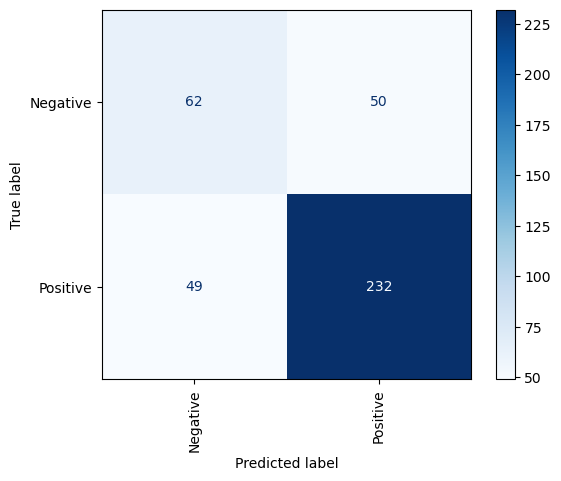

In [260]:
%matplotlib inline

cmd.from_estimator(model, X_test, Y_test,
                   display_labels=['Negative', 'Positive'],
                   cmap='Blues', xticks_rotation='vertical')

Testing the model wtih a test input for face validity

In [267]:
review = 'The long commutes  was extremely bad.'
model.predict_proba(cv.transform([review]))[0][1]

0.43589069566211686

# Bag of Workds Sentiment Analysis

In [326]:
BoWDF = All_Comments2

In [327]:
# Instantiate an object cv by calling a method named as CountVectorzer()
cv1    = CountVectorizer(stop_words = 'english',ngram_range = (1, 2),tokenizer = token.tokenize)

# Train the dataset by calling a fit_transform() method
X_fin = cv.fit_transform(BoWDF['Text'])

# Display the rows and colums
X_fin.shape



(786, 1581)

In [328]:
y1=BoWDF['Sentiment_Score']
y1.shape

(786,)

In [329]:
X_fin

<786x1581 sparse matrix of type '<class 'numpy.int64'>'
	with 83076 stored elements in Compressed Sparse Row format>

In [330]:
# Instantiate an object model by calling a method MultinomialNB()
model1 = MultinomialNB()

In [331]:
# Split the dataset into training and testing parts
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_fin, y1, test_size = 0.3)

In [332]:
# Train the model by calling a method fit()
model1.fit(X_train1,y_train1)

MultinomialNB()

In [333]:
# Call predict() method
y_pred = model1.predict(X_test1)

In [334]:
# Instantiate a mthod named as Cla
cf = classification_report(y_test1, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       0.67      0.26      0.38        68
           1       0.76      0.95      0.84       168

    accuracy                           0.75       236
   macro avg       0.71      0.61      0.61       236
weighted avg       0.73      0.75      0.71       236



Testing the model wtih a test input for face validity to compare against logistic regression model

In [336]:
model1.predict_proba(cv1.transform([review]))[0][1]